Standard imports

In [1]:
import copy
import os.path
from shutil import copy2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Local imports



In [2]:
from initial_params import initial_params
from model_params import modelN, models

from classes import Embryo
from functions import define_initial_protein_concentrations, setup_embryos, run_model, check_embryos_success, define_experiment_groups, set_params_from_df
from plot_functions import create_presentation_fig_arrays, save_presentation_figs, save_method_figs, save_results_figs, set_up_protein_fig

Define save directory for output


In [3]:
save_directory = 'results/jupyter/'
if save_directory[-1] != '/':
    save_directory = save_directory + '/'
if not os.path.isdir('results/'):
    os.mkdir('results/')
if not os.path.isdir(save_directory):
    os.mkdir(save_directory)

Initialize embryos

In [4]:
# initialize embryos
embryoN = 30
embryos = [Embryo('title', initial_params['number_of_cells']) for i in range(embryoN)]

for model_idx, model in enumerate(models):
    
    initial_concentrations = define_initial_protein_concentrations(initial_params)
    embryos = setup_embryos(embryos, model, initial_concentrations)
    

Select embryos

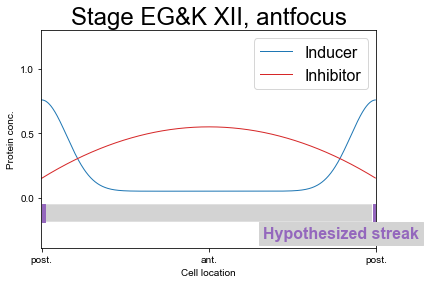

In [5]:
select_embryos = [0] # embryo with no manipulations
# select_embryos = [1,2,3,4] # cell pellet exp 
# select_embryos = [5,6,7,8,9] # microbead repeat of cell pellet 
# select_embryos = [10,11] # manipulate inhibitor in anterior
# select_embryos = [12,13,14] # sub-threshold inducer

# print protein diagrams
for embryo_idx in select_embryos:
    embryo = embryos[embryo_idx]
    fig = set_up_protein_fig(embryo)
    plt.show()

In [ ]:
model_values = np.ndarray((modelN, embryoN, initial_params['number_of_cells']), dtype=float)
model_ylim = np.ndarray((modelN, embryoN, 2), dtype=float)

for model_idx, model in enumerate(models):
    
    for embryo in embryos:
        run_model(embryo, model)
        embryo.find_streaks()
        
    successN, failureN = check_embryos_success(embryos)
    experiments = define_experiment_groups(embryos)
    for exp in experiments:
        exp.find_plot_model_ylim()
        
    model_values[model_idx,:,:], model_ylim[model_idx,:,:] = create_presentation_fig_arrays(embryos)
    temp_model_values, temp_model_ylim = create_presentation_fig_arrays(embryos)

In [ ]:
save_method_figs( models, embryos, model_values, model_ylim, 'Arial', save_directory + 'method/' )
save_results_figs( models, embryos, model_values, model_ylim, 'Arial', save_directory + 'results/' )

code_directory = save_directory + 'code/'
if not os.path.isdir(code_directory):
    os.mkdir(code_directory)

filenames = ['classes.py', 'functions.py', 'plot_functions.py', 'model_params.py', 'bead_params.py', 'initial_params.py']
for filename in filenames:
    copy2(filename, code_directory + filename)